#About Dataset
salaries dataset generally provides information about the employees of an organization in relation to their compensation. It typically includes details such as how much each employee is paid (their salary), their job titles, the departments they work in, and possibly additional information like their level of experience, education, and employment history within the organization.

# Features
- 'Id'
- 'EmployeeName'
- 'JobTitle'
- 'BasePay'
- 'OvertimePay'
- 'OtherPay'
- 'Benefits'
- 'TotalPay' -> salary
- 'TotalPayBenefits'
- 'Year'
- 'Notes'
- 'Agency'
- 'Status'


# Tasks

1. **Basic Data Exploration**: Identify the number of rows and columns in the dataset, determine the data types of each column, and check for missing values in each column.

2. **Descriptive Statistics**: Calculate basic statistics mean, median, mode, minimum, and maximum salary, determine the range of salaries, and find the standard deviation.

3. **Data Cleaning**: Handle missing data by suitable method with explain why you use it.

4. **Basic Data Visualization**: Create histograms or bar charts to visualize the distribution of salaries, and use pie charts to represent the proportion of employees in different departments.

5. **Grouped Analysis**: Group the data by one or more columns and calculate summary statistics for each group, and compare the average salaries across different groups.

6. **Simple Correlation Analysis**: Identify any correlation between salary and another numerical column, and plot a scatter plot to visualize the relationship.

8. **Summary of Insights**: Write a brief report summarizing the findings and insights from the analyses.

# Very Important Note
There is no fixed or singular solution for this assignment, so if anything is not clear, please do what you understand and provide an explanation.

In [1]:
import pandas as pd
import numpy as np

# Load your dataset
df = pd.read_csv('Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [2]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

# Q1

In [3]:
print('num of rows :' , df.shape[0])
print('num of columns :' , df.shape[1])

num of rows : 148654
num of columns : 13


In [4]:
print(df.dtypes)

Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [5]:
missing_values = df.isnull()

In [6]:
missing_counts = missing_values.sum()
print(missing_counts)

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


In [7]:
# percentage of missing values in each column
missing_per = (missing_counts / len(df)) * 100
print(missing_per)

Id                    0.000000
EmployeeName          0.000000
JobTitle              0.000000
BasePay               0.409676
OvertimePay           0.002691
OtherPay              0.002691
Benefits             24.326961
TotalPay              0.000000
TotalPayBenefits      0.000000
Year                  0.000000
Notes               100.000000
Agency                0.000000
Status              100.000000
dtype: float64


In [8]:
for i in df.columns:
    print(i , " : " , df[i].unique().shape[0])

Id  :  148654
EmployeeName  :  110811
JobTitle  :  2159
BasePay  :  109490
OvertimePay  :  65999
OtherPay  :  83226
Benefits  :  98466
TotalPay  :  138486
TotalPayBenefits  :  142098
Year  :  4
Notes  :  1
Agency  :  1
Status  :  1


In [9]:
df = df.fillna(value=0)

# Q2

In [10]:
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
max_salary = df['TotalPay'].max()
min_salary = df['TotalPay'].min()
mode_salary = df['TotalPay'].mode()
standard_deviation = df['TotalPay'].std()

In [11]:
print('mean : ', mean_salary)
print('mode : ', mode_salary)
print('median : ', median_salary)
print('max : ', max_salary)
print('min : ', min_salary)
print('standard deviation: ', standard_deviation)

mean :  74768.32197169267
mode :  0    0.0
Name: TotalPay, dtype: float64
median :  71426.60999999999
max :  567595.43
min :  -618.13
standard deviation:  50517.005273949944


In [12]:
# another way
df['TotalPay'].describe()

count    148654.000000
mean      74768.321972
std       50517.005274
min        -618.130000
25%       36168.995000
50%       71426.610000
75%      105839.135000
max      567595.430000
Name: TotalPay, dtype: float64

# Q3

we notic that columns 'Notes' and 'Status' are totaly empty so we have to drop them , and column 'Agency' has the one value so we can drop it , 
there is no need to drop anything else

In [13]:
df = df.drop(['Notes' ,'Status' , 'Agency'] , axis = 1)
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,0.0,567595.43,567595.43,2011
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,0.0,538909.28,538909.28,2011
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,0.0,335279.91,335279.91,2011
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,0.0,332343.61,332343.61,2011
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,0.0,326373.19,326373.19,2011


# Q4

In [14]:

import matplotlib.pyplot as plt

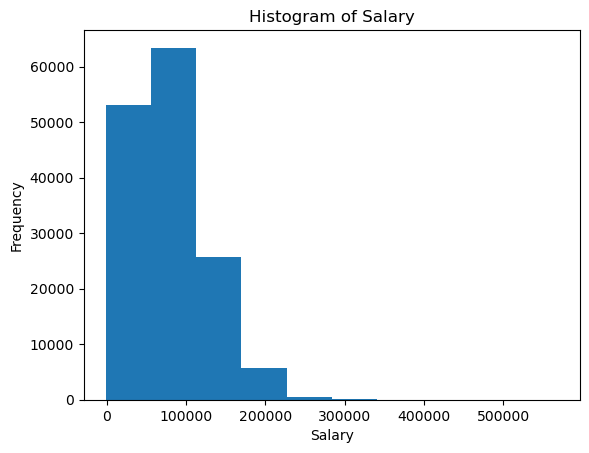

In [15]:
plt.hist(df['TotalPay'])
plt.xlabel('Salary')
plt.ylabel("Frequency")
plt.title(f"Histogram of Salary")
plt.show()

لا يوجد بيانات تدل على القسم department

# Q5

In [16]:
groups = df.groupby('Year').agg(mean=('TotalPay', 'mean'), median=('TotalPay', 'median'), std=('TotalPay', 'std'), Max=('TotalPay', 'max'), Min=('TotalPay', 'min'))

print(groups)

              mean     median           std        Max     Min
Year                                                          
2011  71744.103871  68213.240  47498.706594  567595.43    0.00
2012  74113.262265  70714.680  49523.904319  362844.66    0.00
2013  77611.443142  74500.015  52854.774783  347102.32    0.00
2014  75463.918140  72359.980  51697.713029  471952.64 -618.13


# Q6

In [17]:
correlation = df["TotalPay"].corr(df["Benefits"])
print("Correlation coefficient:", correlation)

Correlation coefficient: 0.6322018839186362


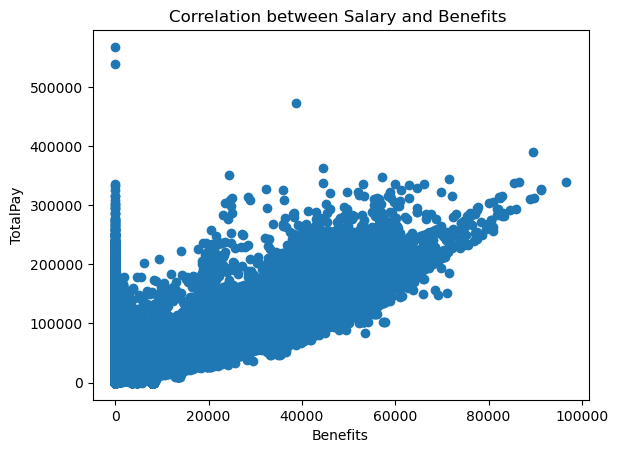

In [18]:
plt.scatter(df["Benefits"], df["TotalPay"])
plt.xlabel("Benefits")
plt.ylabel("TotalPay")
plt.title("Correlation between Salary and Benefits ")
plt.show()

# Good Luck!